1. What does R-squared represent in a regression model?
R-squared ((R2) suggests a good fit, but it does not indicate causation. It should be used alongside residual analysis to ensure model quality. In cases where additional variables do not significantly contribute to predictive power, Adjusted R-squared is preferred.
2. What are the assumptions of linear regression?
Linear regression relies on several assumptions:
- Linearity: Relationship between dependent and independent variables is linear.
- Independence: Observations are independent of each other.
- Homoscedasticity: Residuals (errors) exhibit constant variance.
- Normality: Residuals follow a normal distribution.
- No multicollinearity: Independent variables should not be highly correlated.
Violating these assumptions can lead to inaccurate coefficient estimates and unreliable predictions. Techniques like residual plots, correlation matrices, and variance inflation factors (VIF) help verify assumptions.
3. What is the difference between R-squared and Adjusted R-squared?
While (R2), making the model appear better. Adjusted (R^2) penalizes this and decreases if extra variables do not improve the model significantly. It is useful for comparing models with different numbers of predictors, ensuring model complexity is justified by improved prediction accuracy.
4. Why do we use Mean Squared Error (MSE)?
Mean Squared Error (MSE) measures the average squared differences between actual and predicted values. Since errors are squared, MSE penalizes large deviations more, making it sensitive to outliers. Lower MSE indicates better model performance. It is widely used in regression analysis but should be interpreted alongside other metrics like RMSE and MAE for a balanced view of prediction accuracy.
5. What does an Adjusted R-squared value of 0.85 indicate?
An Adjusted R-squared of 0.85 suggests that 85% of the variance in the dependent variable is explained by the independent variables, accounting for model complexity. This is a strong indicator of good predictive performance, assuming assumptions are met. However, model validation techniques like cross-validation should be used to confirm robustness.
6. How do we check for normality of residuals in linear regression?
Residuals should follow a normal distribution for unbiased predictions. Techniques for checking normality include:
- Histogram or Density Plot: Shows residual distribution.
- Q-Q Plot (Quantile-Quantile): Compares observed residuals to a normal distribution.
- Shapiro-Wilk or Kolmogorov-Smirnov test: Statistical tests for normality.
Non-normal residuals may indicate missing variables or non-linearity.
7. What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when independent variables are highly correlated, making coefficient estimates unreliable. It causes high variance in regression coefficients, leading to misleading interpretations. It is detected using:
- Variance Inflation Factor (VIF): VIF > 10 indicates problematic multicollinearity.
- Correlation Matrix: High correlation values suggest redundancy.
Solutions include removing redundant variables, using Principal Component Analysis (PCA), or applying Ridge Regression.
8. What is Mean Absolute Error (MAE)?
MAE measures the average absolute difference between actual and predicted values. It is less sensitive to outliers than MSE and RMSE since it does not square errors. Lower MAE indicates better predictive performance.
9. What are the benefits of using an ML pipeline?
Machine Learning (ML) pipelines streamline model training by automating data preprocessing, feature selection, model evaluation, and hyperparameter tuning. Benefits include consistency, reducing errors, and efficient workflow execution.
10. Why is RMSE considered more interpretable than MSE?
Root Mean Squared Error (RMSE) takes the square root of MSE, making errors easier to interpret in the original data units. RMSE is useful when understanding prediction deviations in practical terms, such as price prediction errors measured in currency values.
11. What is pickling in Python, and how is it useful in ML?
Pickling serializes Python objects, allowing trained models to be saved and reused. It simplifies model deployment, reducing computation time for inference.
12. What does a high R-squared value mean?
A high (R2) does not confirm causation.
13. What happens if linear regression assumptions are violated?
Violating assumptions leads to biased predictions, inflated errors, and unreliable coefficient estimates. Techniques like log transformation, feature selection, and robust regression mitigate violations.
14. How can we address multicollinearity in regression?
Approaches include removing highly correlated variables, using Ridge Regression, or applying Principal Component Analysis (PCA).
15. How can feature selection improve model performance in regression analysis?
Feature selection removes irrelevant predictors, improving accuracy, reducing overfitting, and enhancing interpretability.
16. How is Adjusted R-squared calculated?
[ \text{Adjusted } R2) \times (n - 1)}{n - p - 1}\right) ]
where n = observations and p = predictors.
17. Why is MSE sensitive to outliers?
Since errors are squared, large deviations significantly impact MSE, making it sensitive to extreme values.
18. What is the role of homoscedasticity in linear regression?
Homoscedasticity ensures constant residual variance, which stabilizes coefficient estimates.
19. What is Root Mean Squared Error (RMSE)?
RMSE calculates the average error magnitude in original data units, making interpretation easier.
20. Why is pickling considered risky?
Pickling can expose models to security vulnerabilities if untrusted data is loaded.
21. What alternatives exist to pickling for saving ML models?
Alternatives include Joblib, ONNX, and TensorFlow SavedModel.
22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity occurs when residual variance changes across data points, leading to inefficient estimates.
23. How can interaction terms enhance a regression model's predictive power?
Interaction terms capture relationships between independent variables, improving predictive accuracy.


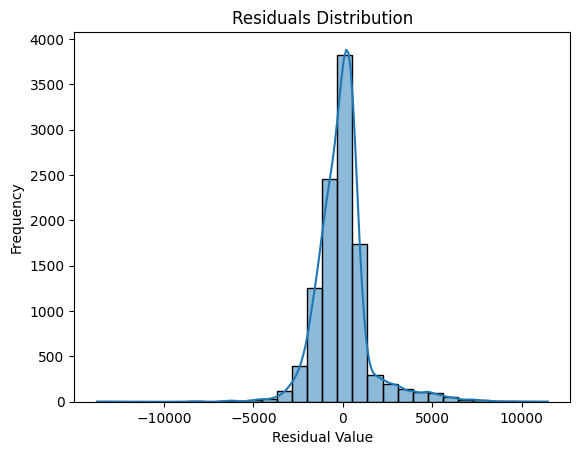

In [1]:
#1. Visualize the distribution of residuals for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Selecting relevant features
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

In [2]:
#2. Calculate and print MSE, MAE, and RMSE for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5  # RMSE is square root of MSE

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 2333883.18
Mean Absolute Error (MAE): 994.74
Root Mean Squared Error (RMSE): 1527.71


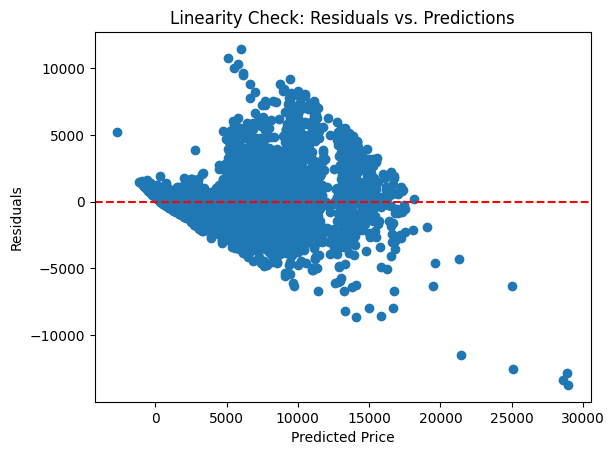

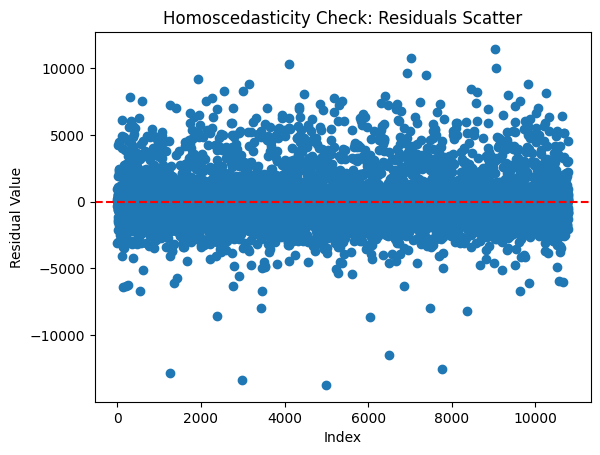

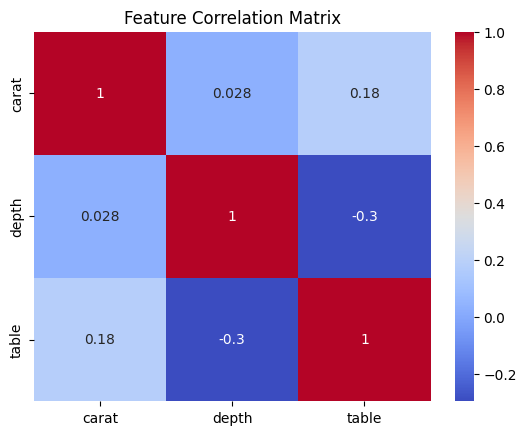

In [3]:
#3. Check if linear regression assumptions are met using visualizations.

import numpy as np

# Linearity check (scatter plot)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linearity Check: Residuals vs. Predictions")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

# Homoscedasticity check (residual plot)
plt.scatter(np.arange(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homoscedasticity Check: Residuals Scatter")
plt.xlabel("Index")
plt.ylabel("Residual Value")
plt.show()

# Multicollinearity check (correlation matrix)
corr_matrix = diamonds[['carat', 'depth', 'table']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [4]:
#4. Create an ML pipeline with feature scaling and evaluate regression models.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R-squared Scores: {scores}")
print(f"Mean R-squared Score: {scores.mean():.2f}")

Cross-Validation R-squared Scores: [0.85307916 0.84924159 0.85210816 0.85848413 0.85570007]
Mean R-squared Score: 0.85


In [5]:
#5. Implement simple linear regression and print coefficients, intercept, and R-squared score.

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared Score: {model.score(X_test, y_test):.2f}")

Intercept: 13056.32
Coefficients: [7873.05329205 -150.40764283 -106.41813265]
R-squared Score: 0.85


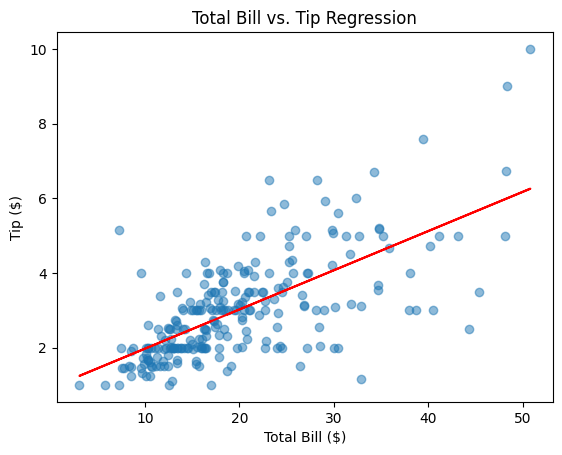

In [6]:
#6. Analyze the relationship between total bill and tip in the 'tips' dataset using simple linear regression.

tips = sns.load_dataset('tips')
X_tips = tips[['total_bill']]
y_tips = tips['tip']

model_tips = LinearRegression()
model_tips.fit(X_tips, y_tips)

# Predict & Visualize
plt.scatter(X_tips, y_tips, alpha=0.5)
plt.plot(X_tips, model_tips.predict(X_tips), color="red")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.title("Total Bill vs. Tip Regression")
plt.show()


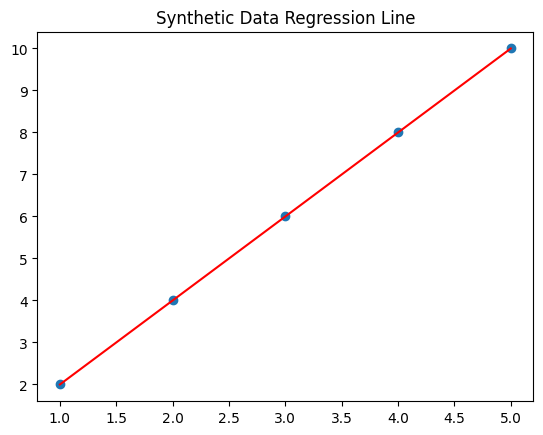

In [7]:
#7. Fit linear regression to a synthetic dataset with one feature, predict new values, and plot regression line.

import numpy as np

X_synthetic = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_synthetic = np.array([2, 4, 6, 8, 10])

model_synthetic = LinearRegression()
model_synthetic.fit(X_synthetic, y_synthetic)

plt.scatter(X_synthetic, y_synthetic)
plt.plot(X_synthetic, model_synthetic.predict(X_synthetic), color="red")
plt.title("Synthetic Data Regression Line")
plt.show()

In [8]:
#8. Pickle a trained linear regression model and save it to a file

import pickle

with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

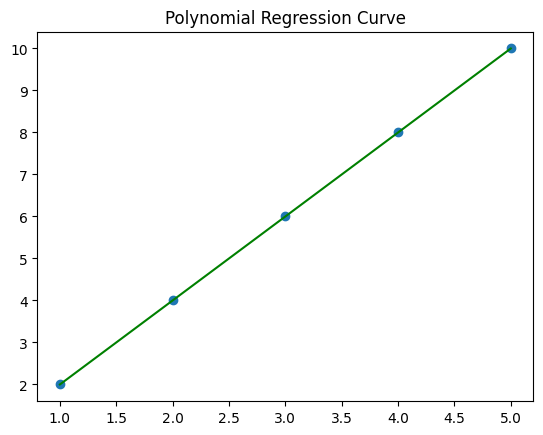

In [9]:
#9. Fit a polynomial regression model (degree 2) and plot the regression curve.

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_synthetic)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_synthetic)

plt.scatter(X_synthetic, y_synthetic)
plt.plot(X_synthetic, model_poly.predict(X_poly), color="green")
plt.title("Polynomial Regression Curve")
plt.show()

In [10]:
# 10. Generate synthetic data and fit a simple linear regression model, printing coefficient and intercept

np.random.seed(42)
X_random = np.random.rand(20, 1) * 10
y_random = 2.5 * X_random + np.random.randn(20, 1) * 2  # Linear equation with noise

model_random = LinearRegression()
model_random.fit(X_random, y_random)

print(f"Coefficient: {model_random.coef_[0][0]:.2f}")
print(f"Intercept: {model_random.intercept_[0]:.2f}")

Coefficient: 2.40
Intercept: -0.07


In [11]:
#11. Fit polynomial regression models of different degrees and compare performance.

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X_poly_test = np.random.rand(20, 1) * 10
y_poly_test = 5 * X_poly_test ** 2 - 3 * X_poly_test + np.random.randn(20, 1) * 10  # Quadratic equation with noise

# Compare models with different polynomial degrees
degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly.fit_transform(X_poly_test)

    model_poly = LinearRegression()
    model_poly.fit(X_poly_transformed, y_poly_test)

    y_poly_pred = model_poly.predict(X_poly_transformed)
    r2 = r2_score(y_poly_test, y_poly_pred)
    print(f"Degree {degree}: R-squared Score = {r2:.2f}")

Degree 1: R-squared Score = 0.93
Degree 2: R-squared Score = 1.00
Degree 3: R-squared Score = 1.00
Degree 4: R-squared Score = 1.00


In [12]:
#12. Fit a simple linear regression model with two features and print coefficients, intercept, and R-squared score
from sklearn.datasets import make_regression

# Generate synthetic data with two features
X_two_features, y_two_features = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Fit model
model_two_features = LinearRegression()
model_two_features.fit(X_two_features, y_two_features)

# Print details
print(f"Intercept: {model_two_features.intercept_:.2f}")
print(f"Coefficients: {model_two_features.coef_}")
print(f"R-squared Score: {model_two_features.score(X_two_features, y_two_features):.2f}")


Intercept: 0.22
Coefficients: [86.00258028 74.11675411]
R-squared Score: 0.99


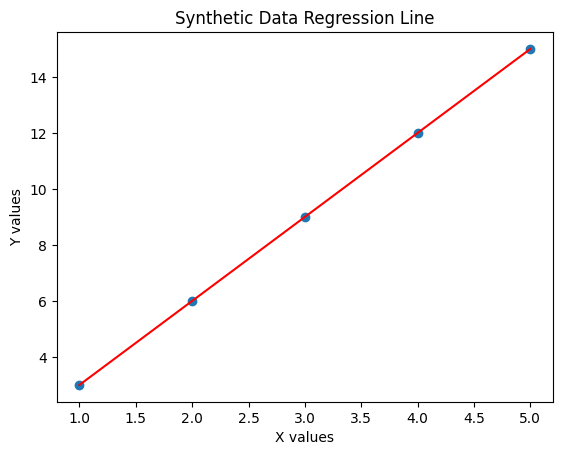

In [13]:
#13. Generate synthetic data, fit a linear regression model, and visualize the regression line.

import numpy as np

# Generate synthetic dataset
X_synthetic = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_synthetic = np.array([3, 6, 9, 12, 15])

# Train model
model_synthetic = LinearRegression()
model_synthetic.fit(X_synthetic, y_synthetic)

# Visualize
import matplotlib.pyplot as plt
plt.scatter(X_synthetic, y_synthetic)
plt.plot(X_synthetic, model_synthetic.predict(X_synthetic), color="red")
plt.title("Synthetic Data Regression Line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

In [14]:
#14. Use Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Sample Data
np.random.seed(42)
X_vif = pd.DataFrame(np.random.rand(100, 3), columns=["Feature1", "Feature2", "Feature3"])

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

    Feature       VIF
0  Feature1  2.657195
1  Feature2  2.803703
2  Feature3  2.554971


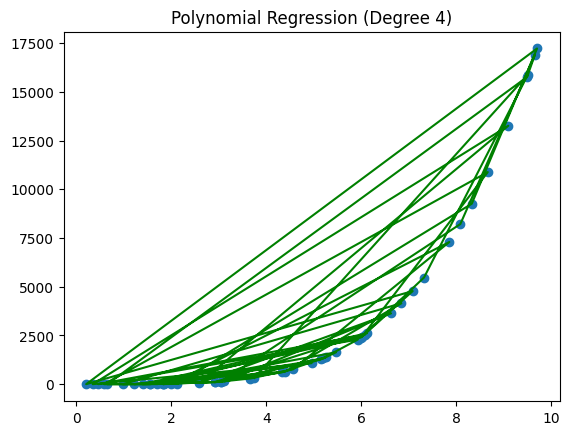

In [15]:
# Question 15: Generate synthetic data for a polynomial relationship (degree 4), fit a polynomial regression model, and plot the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X_poly_deg4 = np.random.rand(50, 1) * 10
y_poly_deg4 = 2 * X_poly_deg4**4 - 5 * X_poly_deg4**2 + np.random.randn(50, 1) * 10

# Transform and fit model
poly4 = PolynomialFeatures(degree=4)
X_poly4_transformed = poly4.fit_transform(X_poly_deg4)

model_poly4 = LinearRegression()
model_poly4.fit(X_poly4_transformed, y_poly_deg4)

# Visualization
plt.scatter(X_poly_deg4, y_poly_deg4)
plt.plot(X_poly_deg4, model_poly4.predict(X_poly4_transformed), color="green")
plt.title("Polynomial Regression (Degree 4)")
plt.show()

In [16]:
# Question 16: Create an ML pipeline with data standardization and a multiple linear regression model, then print the R-squared score.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X_pipeline, y_pipeline = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train model
pipeline.fit(X_pipeline, y_pipeline)

# Print R-squared score
print(f"Pipeline R-squared Score: {pipeline.score(X_pipeline, y_pipeline):.2f}")

Pipeline R-squared Score: 0.99


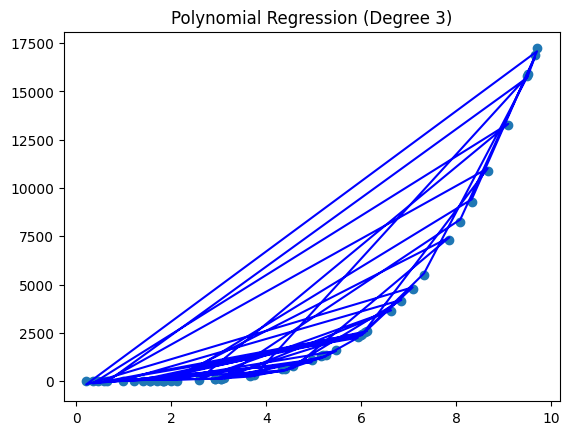

In [17]:
# Question 17: Perform polynomial regression (degree 3) on a synthetic dataset and plot the regression curve.

poly3 = PolynomialFeatures(degree=3)
X_poly3_transformed = poly3.fit_transform(X_poly_deg4)

model_poly3 = LinearRegression()
model_poly3.fit(X_poly3_transformed, y_poly_deg4)

plt.scatter(X_poly_deg4, y_poly_deg4)
plt.plot(X_poly_deg4, model_poly3.predict(X_poly3_transformed), color="blue")
plt.title("Polynomial Regression (Degree 3)")
plt.show()

In [18]:
# Question 18: Perform multiple linear regression on a synthetic dataset with 5 features and print the R-squared score.

X_multiple, y_multiple = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y_multiple)

print(f"R-squared Score: {model_multiple.score(X_multiple, y_multiple):.2f}")

R-squared Score: 1.00


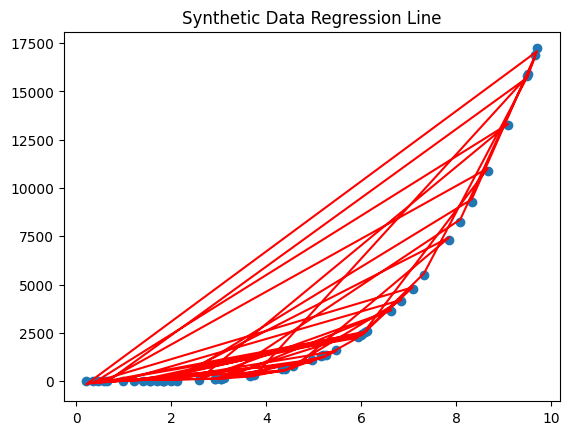

In [19]:
# Question 19: Generate synthetic data for linear regression, fit a model, and visualize the regression line.

plt.scatter(X_poly_deg4, y_poly_deg4)
plt.plot(X_poly_deg4, model_poly3.predict(X_poly3_transformed), color="red")
plt.title("Synthetic Data Regression Line")
plt.show()

In [20]:
# Question 20: Create a synthetic dataset with 3 features and perform multiple linear regression.

X_3features, y_3features = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

model_3features = LinearRegression()
model_3features.fit(X_3features, y_3features)

print(f"R-squared Score: {model_3features.score(X_3features, y_3features):.2f}")
print(f"Coefficients: {model_3features.coef_}")

R-squared Score: 0.99
Coefficients: [28.3172211  73.99152663 18.79832083]


In [27]:
# Question 21: Serialize and deserialize ML models using joblib instead of pickling.

from joblib import dump, load
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X_joblib = np.array([[1], [2], [3], [4], [5]])
y_joblib = np.array([2, 4, 6, 8, 10])

# Train model
model_joblib = LinearRegression()
model_joblib.fit(X_joblib, y_joblib)

# Save model
dump(model_joblib, 'linear_model.joblib')

# Load model
loaded_model = load('linear_model.joblib')

# Predict and explicitly convert output to float before formatting
prediction = loaded_model.predict([[6]])[0]
print(f"Loaded Model Prediction: {float(prediction):.2f}")

Loaded Model Prediction: 12.00


In [26]:
# Question 22: Perform linear regression with categorical features using one-hot encoding (Seaborn 'tips' dataset).

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

tips = sns.load_dataset('tips')
tips_encoded = pd.get_dummies(tips[['total_bill', 'day']], drop_first=True)

X_tips_cat = tips_encoded
y_tips_cat = tips['tip']

model_tips_cat = LinearRegression()
model_tips_cat.fit(X_tips_cat, y_tips_cat)

print(f"R-squared Score: {model_tips_cat.score(X_tips_cat, y_tips_cat):.2f}")

R-squared Score: 0.46


In [25]:
# Question 23: Compare Ridge Regression with Linear Regression on a synthetic dataset and print coefficients.

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_multiple, y_multiple)

print(f"Ridge Regression Coefficients: {ridge_model.coef_}")
print(f"Linear Regression Coefficients: {model_multiple.coef_}")

Ridge Regression Coefficients: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]
Linear Regression Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]


In [24]:
# Question 24: Use cross-validation to evaluate a Linear Regression model.

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_multiple, X_multiple, y_multiple, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean R-squared Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.99336803 0.99000491 0.99770889 0.9913085  0.99330699]
Mean R-squared Score: 0.99


In [23]:
# Question 25: Compare polynomial regression models of different degrees and print R-squared scores.

degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_transformed = poly.fit_transform(X_poly_deg4)

    model_poly = LinearRegression()
    model_poly.fit(X_poly_transformed, y_poly_deg4)

    y_poly_pred = model_poly.predict(X_poly_transformed)
    r2 = r2_score(y_poly_deg4, y_poly_pred)
    print(f"Degree {degree}: R-squared Score = {r2:.2f}")

Degree 1: R-squared Score = 0.73
Degree 2: R-squared Score = 0.98
Degree 3: R-squared Score = 1.00
Degree 4: R-squared Score = 1.00
